# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Looking at the BFSI project **Financial Risk Management through Fraud Detection, Credit Approval,
and Loan Default Prediction** we have three datasets:

* Credit Card Fraud Detection
* Credit Card Approval Prediction
* Loan Default Prediction

Looking at these datasets from the perspective of "Who, What, and How" we might write the following:

* **Who**: Credit risk managers and data science leadership responsible for approving tools and strategies that enhance risk assessment and mitigation
* **What**: The machine learning project to better assess credit risk was a success: please approve productionalization of the model(s) and expansion of the model to other subject areas
* **How**: Illustrate the success of prevention of credit related fraud / savings by proactive risk monitoring

# 3. Homework - work with your own data

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

Let's start by first loading our datasets

In [9]:
# Credit Card Fraud Data
CreditCardFraud = pd.read_csv("fraudTrain.csv")

# Credit Card Approval Dataset
CreditCardApproval = pd.read_csv("Application_Data.csv")

# Loan Default Prediction
LoanDefaultPrediction = pd.read_csv("LoanDefault.csv")

Now lets create some helper functions that we can use to analyze our datasets

In [11]:
def samples(df):
    samples = df.sample(n=10)
    samples

In [12]:
def summarize(df):
    print("DataFrame Info")
    df.info()
    print("\nDescriptive Statistics")
    print(df.describe())

In [13]:
def get_counts(lst):
    counts = lst.value_counts()
    return counts

In [14]:
def duplicate_rows(df):
    duplicates = df[df.duplicated(keep=False)]
    if duplicates.empty:
        print("No duplicates found in the dataset")
    else:
        print(f"{len(duplicates)} duplicate rows found:\n")
        print(duplicates)
    return duplicates

In [15]:
def column_duplicates(df, col):
    duplicates = df.duplicated(subset=[col], keep=False)
    non_unique_vals = df[duplicates][col].unique()
    if len(non_unique_vals) == 0:
        print(f"No duplicate values found in column '{col}'.")
    else:
        print(f"{len(non_unique_vals)} rows with duplicate values found in column '{col}':\n")
        print(f"Non-Unqiue {col} Example: {non_unique_vals[0]}")
    return non_unique_vals

In [16]:
def col_summary_stastistics(df, col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()

    print(f"{col} Mean: {mean_val}")
    print(f"{col} Median: {median_val}")
    print(f"{col} Mode: {mode_val.tolist()}")
    print('\n')

In [17]:
def missing_null_vals(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print("No missing values found in the DataFrame.")
    else:
        print("Missing values found in the following columns:\n")
        print(missing)

In [18]:
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
        else:
            if not df[col].mode().empty:
                mode_value = df[col].mode()[0]
                df[col] = df[col].fillna(mode_value)
            else:
                df[col] = df[col].fillna('Missing')
    return df

In [19]:
def one_hot_encoding(df, cols):
    df_encoded = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col])
        dummies = dummies.astype(int)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
    return df_encoded

Now we can apply these to our datasets from earlier.

## **Credit Card Fraud Data**

it appears that our first column functions similar to an index/unique identifier. As this will most likely not be too useful for our analysis (and given the fact that we already have an index), we can drop the column.

In [23]:
CreditCardFraud = CreditCardFraud.drop('Unnamed: 0', axis=1)

Next let's get some info and sample on our dataframe

In [25]:
CreditCardFraud.sample(n=5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
505060,2019-08-07 09:45:44,3540210836308425,"fraud_Huel, Hammes and Witting",grocery_pos,123.16,Steven,Yoder,M,94975 David Mews Apt. 316,Summerfield,...,34.7437,-102.5064,53,Fisheries officer,1992-06-19,e1ed67d53bf9c729fdfa8567fa57564a,1344332744,34.526967,-102.387480,0
940474,2020-01-10 18:00:48,371226440126102,"fraud_Monahan, Hermann and Johns",travel,1.81,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,Mulberry Grove,...,38.9311,-89.2463,1810,Race relations officer,1974-12-24,db63773ed6330785ed0a9296084d1158,1357840848,37.950109,-89.030439,0
1028845,2020-03-02 12:25:03,213112402583773,"fraud_Nitzsche, Kessler and Wolff",shopping_pos,2.43,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,a16a0839c5104e1329300a9a88827bbe,1362227103,34.381671,-81.458499,0
835930,2019-12-12 13:42:07,4755696071492,"fraud_Labadie, Treutel and Bode",shopping_net,658.39,Robert,Evans,M,01892 Patricia Vista Apt. 828,Sachse,...,32.9643,-96.6012,20328,Site engineer,1985-06-20,1cc5cbe44a3316b702cc8eed6b4ea256,1355319727,32.742403,-97.402003,0
145071,2019-03-19 07:16:31,3517527805128735,fraud_Rempel PLC,grocery_net,41.78,Tracy,Conway,F,6778 Campos Field,Bonfield,...,41.1573,-88.0619,1617,Medical secretary,1990-04-25,98382c826aefcceb6926086ceb50aecc,1332141391,41.478197,-88.058961,0


In [26]:
CreditCardFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

Looking at the results above, there are a few thing's that come to mind. Firsr our transaction date time and dob columns are objects, and will need to be converted to a date similar to what was performed in week 1's homework. Let's quickly fix that.

In [28]:
CreditCardFraud['trans_date_trans_time'] = pd.to_datetime(CreditCardFraud['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
CreditCardFraud['dob'] = pd.to_datetime(CreditCardFraud['dob'], format='%Y-%m-%d')

CreditCardFraud[['trans_date_trans_time','dob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 2 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   dob                    1296675 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 19.8 MB


Lets calculate the age of the customers in our dataset while we are at it

In [30]:
CreditCardFraud['age'] = (datetime.now() - CreditCardFraud['dob']).dt.days // 365

In [31]:
CreditCardFraud[['dob','age']].sample(n=5)

,dob,age
979206,1967-08-30,57
570298,1990-12-18,34
31290,1987-09-26,37
379676,1988-10-26,36
182403,1994-10-07,30


Next let's get some summary statistics on a our columns. Due to the fact that only a few of the columns are numeric, we will just look at a handful of relevant columns

In [33]:
desc = CreditCardFraud[['amt', 'city_pop', 'age', 'lat', 'long',]].describe()
desc.map(lambda x: '{:.2f}'.format(x))

,amt,city_pop,age,lat,long
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,70.35,88824.44,51.22,38.54,-90.23
std,160.32,301956.36,17.41,5.08,13.76
min,1.00,23.00,20.00,20.03,-165.67
25%,9.65,743.00,38.00,34.62,-96.80
50%,47.52,2456.00,49.00,39.35,-87.48
75%,83.14,20328.00,62.00,41.94,-80.16
max,28948.90,2906700.00,100.00,66.69,-67.95


As we just figured out, many of our columns are categorical variables (names, cities, etc.) While it would be exhaustive in this exercise to look at every single column, we can definitely examine a couple that might be interesting.

In [35]:
states = get_counts(CreditCardFraud['state'])
states[0:9]

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
Name: count, dtype: int64

In [36]:
occupations = get_counts(CreditCardFraud['job'])
occupations[0:9]

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
Designer, ceramics/pottery    8225
Systems developer             7700
IT trainer                    7679
Financial adviser             7659
Name: count, dtype: int64

In [37]:
genders = get_counts(CreditCardFraud['gender'])
genders

gender
F    709863
M    586812
Name: count, dtype: int64

Now that we have seen a bit of our dataset, let's check for any duplicate rows

In [39]:
duplicate_rows(CreditCardFraud)

No duplicates found in the dataset


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age


Looking at the above result, there do not appear to be any duplicate rows in our dataset. We can however look to see if there are any duplicate values for individual columns. Since this is related to credit card sales, there are many columns we would expect to have duplicate values (state, city, names, etc.). With that being said, there are a couple columns that we might be interested in when checking for dupes.

In [41]:
non_unique_cc_nums = column_duplicates(CreditCardFraud, 'cc_num')

983 rows with duplicate values found in column 'cc_num':

Non-Unqiue cc_num Example: 2703186189652095


In [42]:
CreditCardFraud[CreditCardFraud['cc_num'] == non_unique_cc_nums[0]][0:3]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,37
1565,2019-01-01 16:53:34,2703186189652095,fraud_Ruecker-Mayert,kids_pets,114.79,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,fadb4dafef079a1a0381360bbe80b3c0,1325436814,35.083586,-80.625951,0,37
2299,2019-01-01 23:02:37,2703186189652095,fraud_Pacocha-Weissnat,kids_pets,16.55,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,1318500aff9644abe2e4a8c562eab7bc,1325458957,35.532409,-82.170017,0,37


Looking at the above output, we can see that the customer has multiple payments in this dataset (more than just what is being shown). While this is fine in the context of this dataset, we might want to be careful with how we process the data as one customer with many transactions could potentially cause certain models to become weighted.

next, let's look at the mean, median, and modes for some of our relevant categorical data

In [45]:
interested_numeric_columns = ['amt', 'age', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
for col in interested_numeric_columns:
    col_summary_stastistics(CreditCardFraud, col)

amt Mean: 70.35103545607033
amt Median: 47.52
amt Mode: [1.14]


age Mean: 51.21648678350396
age Median: 49.0
age Mode: [49]


city_pop Mean: 88824.44056297839
city_pop Median: 2456.0
city_pop Mode: [606]


lat Mean: 38.53762161489965
lat Median: 39.3543
lat Mode: [36.385]


long Mean: -90.22633537864147
long Median: -87.4769
long Mode: [-98.0727]


merch_lat Mean: 38.53733804469971
merch_lat Median: 39.36568
merch_lat Mode: [32.644690000000004, 33.108462, 33.491366, 33.849191999999995, 33.995152000000004, 34.048439, 34.134994, 37.669788, 37.695715, 38.050673, 38.552578, 38.686512, 38.714096000000005, 38.895098, 38.985166, 39.348185, 39.734227, 39.818513, 39.845849, 39.983138, 40.016559, 40.160183, 40.277086, 40.351897, 40.456305, 40.550199, 40.557026, 40.772096000000005, 41.014694, 41.127044, 41.212506, 41.271468, 41.301611, 41.305966, 41.522948, 41.568128, 41.632488, 41.731663, 41.847083000000005, 41.878848, 41.910192, 41.937796, 42.011951, 42.265012, 42.749184, 42.889354, 42.890922,

Next let's examine our data to see if there are any null or missing values.

In [47]:
missing_null_vals(CreditCardFraud)

No missing values found in the DataFrame.


Because this is a kaggle dataset, I am not surprised that there are no missing values in our dataset. While this is not reflective of real world data, it is helpful for academic purposes. Next let's explore our data for some potentially inconsistent data. First lets's start with our customer ages.

<Axes: >

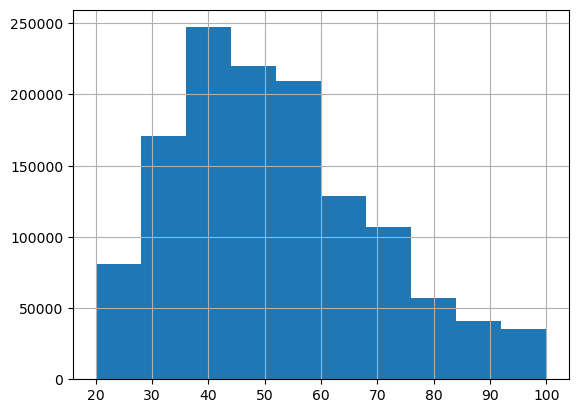

In [49]:
CreditCardFraud['age'].hist()

Our age breakdown looks very typical with no particular outliers immediately popping out at us. Let's do the same with our transaction data. Earlier in our analysis when we ran the describe function, we saw a couple large values... let's check one out.

In [51]:
CreditCardFraud[CreditCardFraud['amt'] == CreditCardFraud['amt'].max()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.9,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,...,-99.3844,73,Product designer,1935-02-10,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,42.317313,-99.139498,0,90


looking at this, we can see that this 90 year old customer made a single travel related transaction near $30,000. While this can happen I definitely think it might warrent a closer look. Unfortunately with the details we have in the dataset, we can only extrapolate so much. Next, similar to week 1, lets look at customer ages relative to when they made their purchases.

In [53]:
CreditCardFraud['Age_at_Purchase'] = (CreditCardFraud['trans_date_trans_time'] - CreditCardFraud['dob']).dt.days // 365

Text(0.5, 1.0, 'Customer Age at Time of Purchase')

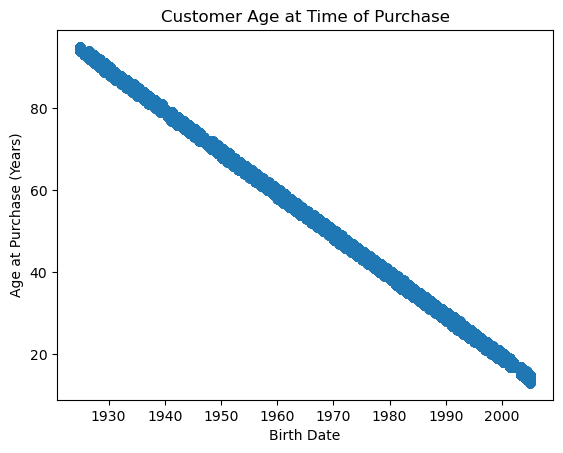

In [54]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.scatter(CreditCardFraud["dob"], CreditCardFraud["Age_at_Purchase"])
ax.set_ylabel("Age at Purchase (Years)")
ax.set_xlabel("Birth Date")
ax.set_title("Customer Age at Time of Purchase")

In [55]:
earliest = CreditCardFraud[CreditCardFraud['trans_date_trans_time'] == CreditCardFraud['trans_date_trans_time'].min()]
earliest

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,Age_at_Purchase
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,37,30


In [56]:
latest = CreditCardFraud[CreditCardFraud['trans_date_trans_time'] == CreditCardFraud['trans_date_trans_time'].max()]
latest

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,Age_at_Purchase
1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.3,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.18611,0,29,24


Looking at some of the age and transaction time stamps, we can see that there is a pretty clear negative linear relationship in our data. This signifies that that there are no odd customers in our dataset (someone born in the future making a transaction in the past or vise versa). Again while this is somewhat expected of a kaggle dataset, it is still something that is good to check for.

Moving on, lets use one-hot encoding on some of our categorical variables. Looking over our dataset the most valuable columns we would look to encode would most likely be merchant, category, gender, and job. We will forgo encoding values like credit card number, name, and city as they are either meant to be unique identifiers, or act as non-informative high cardinality text values, which could create sparse arrays that may not be useful for ML applications.

In [59]:
cols_to_encode = ['merchant', 'category', 'gender']

In [60]:
CreditCardFraudEncoded = one_hot_encoding(CreditCardFraud, cols_to_encode)

In [61]:
CreditCardFraudEncoded.sample(n=5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,F,M
311932,2019-05-31 03:40:13,3513618443244549,"fraud_Goldner, Kovacek and Abbott",grocery_pos,115.57,Amber,Perez,F,954 Reyes Ways,Fulton,...,0,0,0,0,0,0,0,0,1,0
682738,2019-10-18 17:35:21,213161231269724,"fraud_Cronin, Kshlerin and Weber",health_fitness,24.67,Alyssa,Morgan,F,622 Robin Run Suite 764,Gadsden,...,0,0,0,0,0,0,0,0,1,0
20387,2019-01-13 10:02:29,3593118134380341,"fraud_Quitzon, Green and Bashirian",shopping_pos,6.58,Laura,Casey,F,6114 Moran Way,Steuben,...,0,0,0,0,0,0,1,0,1,0
1278576,2020-06-14 23:13:37,377234009633447,fraud_Gibson-Deckow,entertainment,23.64,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,0,0,0,0,0,0,0,0,1,0
632269,2019-09-26 05:36:44,213161869125933,"fraud_Rippin, Kub and Mann",misc_net,8.40,Monica,Lane,F,3270 Scott Islands,East Andover,...,0,0,1,0,0,0,0,0,1,0


lastly, let's export our dataset for easier use in future assignments

In [63]:
#CreditCardFraudEncoded.to_csv('CreditCardFraudCleaned.csv', index=False)

### **Conclusion: Credit Card Fraud Data**

After doing some exploration of this dataset, I would very much argue that it is suitable for data science applications. Other than fixing some datatypes and doing some basic feature engineering/encoding, the dataset out of the box is quite clean and does not contain any surface level issues. While we did not go too in depth when looking at individual categories, the dataset does appear to have a good mix of values both from a customer level and transcational one. The one thing I would point out is that one customer can appear in this dataset multiple times. As a result we might want to consider how we sample the dataset going forward or look to mask certain information when performing model training (we would want to avoid issues where a model might start to fit towards certain individuals purchasing patterns). Overall however this dataset is incredibly clean and ready to be worked with more going forward.

## **Credit Card Approval Data**

In [67]:
CreditCardApproval.sample(n=10)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
6063,5041769,F,1,0,0,315000,State servant ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,Managers ...,2,50,28,0,11,1
12739,5085670,F,0,1,0,180000,Working ...,Secondary / secondary special ...,Widow ...,House / apartment ...,...,0,0,0,Accountants ...,1,49,5,0,17,1
4268,5029169,F,0,0,1,202500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,1,0,Medicine staff ...,3,54,33,0,31,1
189,5009078,M,0,1,1,180000,Working ...,Secondary / secondary special ...,Married ...,With parents ...,...,0,0,0,Drivers ...,3,39,4,0,31,1
13275,5088832,F,0,1,0,612000,State servant ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,1,Accountants ...,2,35,11,2,4,1
6178,5042010,F,0,0,0,157500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,1,0,0,Managers ...,2,34,3,1,11,1
11534,5068254,M,0,1,2,90000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Sales staff ...,4,53,8,0,24,1
14419,5090980,F,0,0,0,180000,Working ...,Secondary / secondary special ...,Separated ...,House / apartment ...,...,0,0,0,Cooking staff ...,1,38,8,0,18,1
90,5008918,F,0,1,0,297000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,Rented apartment ...,...,0,0,0,Laborers ...,1,43,9,1,16,1
10054,5062249,F,1,0,0,315000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Managers ...,2,54,12,0,31,1


In [68]:
CreditCardApproval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

Looking at the data it appears that many of these columns are already binary (Y/N 1/0). Lets run description on some of our numerical columns first.

In [70]:
desc = CreditCardApproval[['Total_Children', 'Total_Income', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt']].describe()
desc.map(lambda x: '{:.2f}'.format(x))

,Total_Children,Total_Income,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
count,25128.00,25128.00,25128.00,25128.00,25128.00,25128.00
mean,0.51,194836.50,41.00,7.69,0.33,21.06
std,0.76,104521.12,9.55,6.42,1.57,14.74
min,0.00,27000.00,21.00,1.00,0.00,1.00
25%,0.00,135000.00,33.00,3.00,0.00,9.00
50%,0.00,180000.00,40.00,6.00,0.00,18.00
75%,1.00,225000.00,48.00,10.00,0.00,31.00
max,5.00,1575000.00,68.00,44.00,49.00,61.00


Immediately looking at this dataset we can see that the average total income for our applicants is well over 190K which well over the US national average of 59K (could this possibly be household income?). This might be of concern down the road and we may want to consider transforming the data at some point. Next lets do a quick hist of our datapoints to see if there are any other interesting trends.

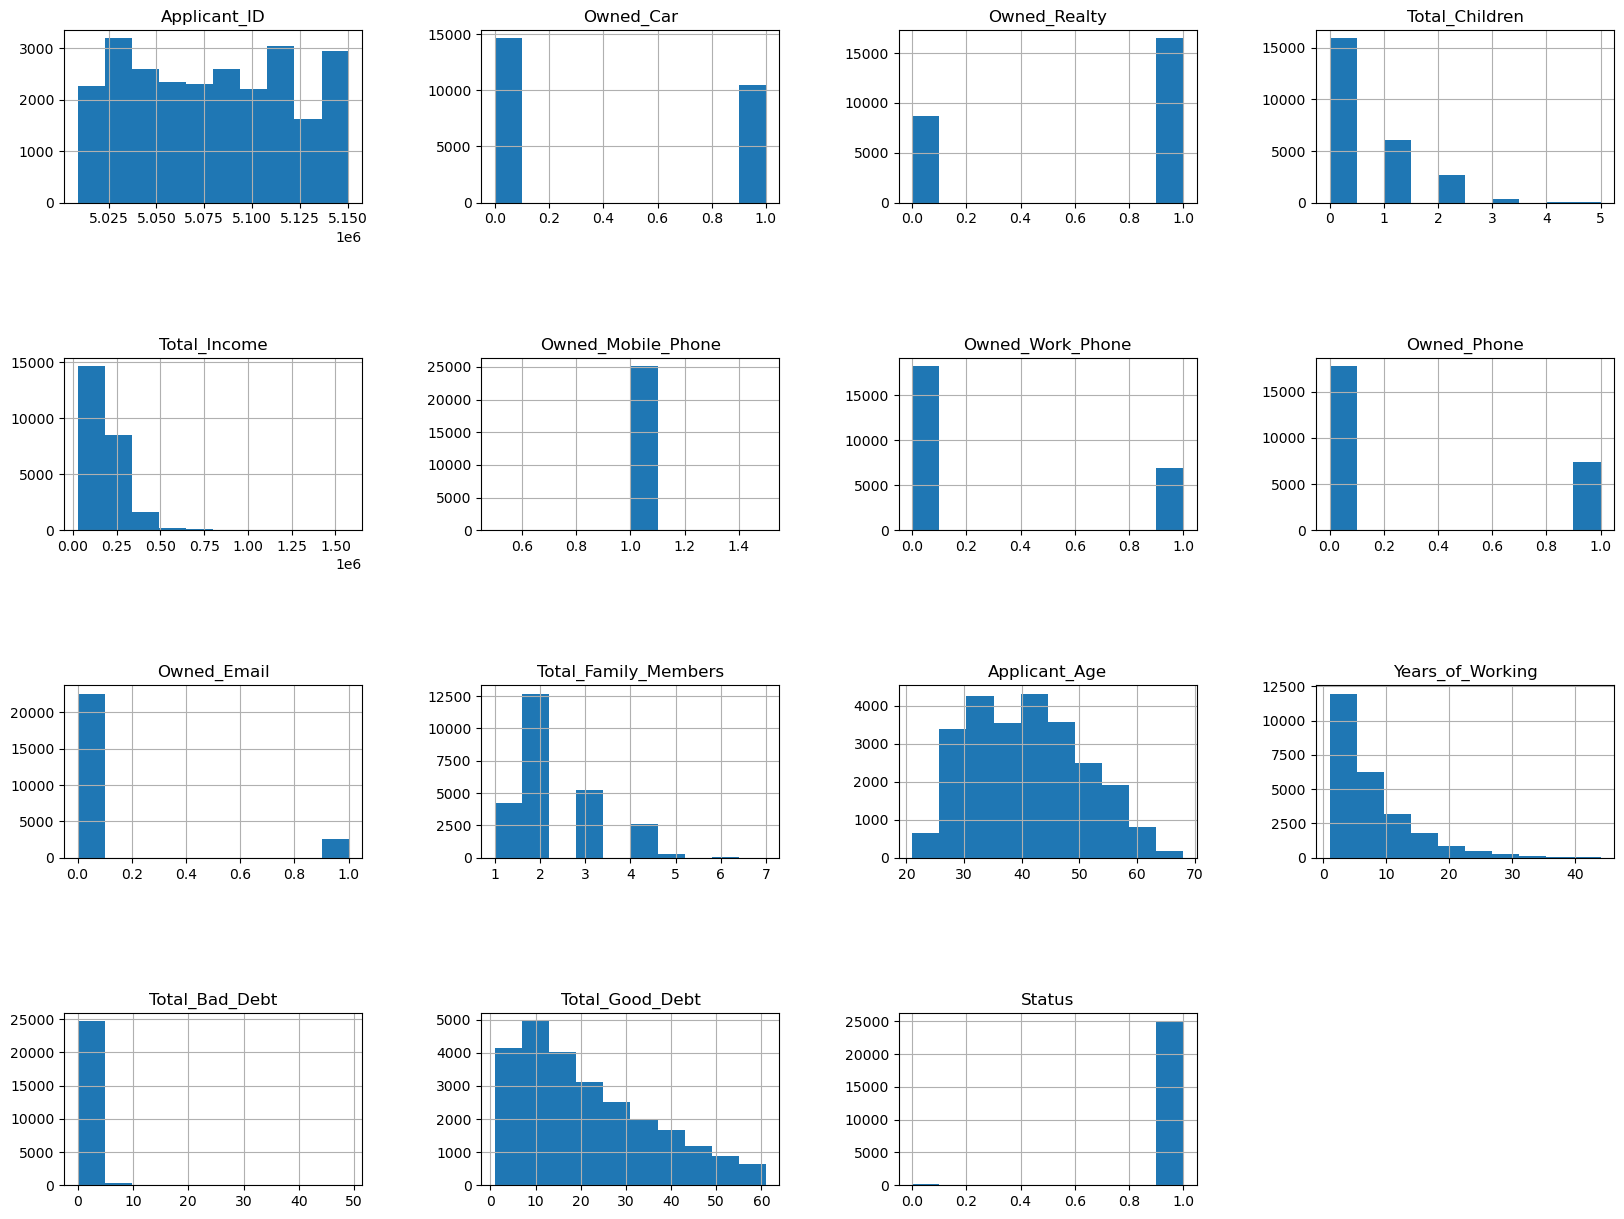

In [72]:
CreditCardApproval.hist(figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.9)

Looking at our graphs above there are definitely some interesting distributions. Looking at the Years_of_Working, it does appear that this is mostly skeweed towards younger members of the work force, while the applicant age suggests a relatively even distribution around ~40 years old which tracks with our summary statistics. lets look at a couple of our categorical variables as well.

In [74]:
genders = get_counts(CreditCardApproval['Applicant_Gender'])
genders

Applicant_Gender
F          15627
M           9501
Name: count, dtype: int64

In [75]:
education = get_counts(CreditCardApproval['Education_Type'])
education

Education_Type
Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: count, dtype: int64

In [76]:
family_stat = get_counts(CreditCardApproval['Family_Status'])
family_stat

Family_Status
Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
Name: count, dtype: int64

In [77]:
housing = get_counts(CreditCardApproval['Housing_Type'])
housing

Housing_Type
House / apartment                                     22096
With parents                                           1430
Municipal apartment                                     812
Rented apartment                                        439
Office apartment                                        199
Co-op apartment                                         152
Name: count, dtype: int64

Looking at some of our categorical variables we can definitely start to see some patterns and potential skew. Specifically, most of our applicants appear to be married females, with secondary education. While we should definitely take this into account, it should not pose too much of an issue for this exercise.

Next let's look for some duplicate values.

In [79]:
duplicate_rows(CreditCardApproval)

No duplicates found in the dataset


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status


Again given that this is a kaggle dataset, this is not too surprising. Let's look to double check tha there are no duplicated applicant ids.

In [81]:
duplicate_ids = column_duplicates(CreditCardApproval, 'Applicant_ID')

No duplicate values found in column 'Applicant_ID'.


Luckily there are no duplicate ids as well, which is what is most important for this dataset. Now lets get some mean, medians, and modes

In [83]:
interested_numeric_columns = ['Total_Children', 'Total_Income', 'Applicant_Age', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt']
for col in interested_numeric_columns:
    col_summary_stastistics(CreditCardApproval, col)

Total_Children Mean: 0.509471505889844
Total_Children Median: 0.0
Total_Children Mode: [0]


Total_Income Mean: 194836.49856733525
Total_Income Median: 180000.0
Total_Income Mode: [135000]


Applicant_Age Mean: 40.995503024514484
Applicant_Age Median: 40.0
Applicant_Age Mode: [38]


Years_of_Working Mean: 7.690902578796561
Years_of_Working Median: 6.0
Years_of_Working Mode: [2]


Total_Bad_Debt Mean: 0.3330945558739255
Total_Bad_Debt Median: 0.0
Total_Bad_Debt Mode: [0]


Total_Good_Debt Mean: 21.05754536771729
Total_Good_Debt Median: 18.0
Total_Good_Debt Mode: [7]




Nothing too surprising here that wasn't already shown via the info() and describe() function. Interestingly enough however, the mode of the good debt is a lot lower than the mean/average. Looking at the histogram, this could be caused by some outlier values (we can see some folks with 50+) brining up the average.

Next lets check for some null or missing values.

In [85]:
missing_null_vals(CreditCardApproval)

No missing values found in the DataFrame.


Finally, we have a number of columns that we can use one-hot encoding on. Let's get to it!

In [87]:
cols_to_encode = ["Applicant_Gender", "Income_Type", "Education_Type", "Family_Status", "Housing_Type"]
CreditCardApprovalEncoded = one_hot_encoding(CreditCardApproval, cols_to_encode)

In [88]:
CreditCardApprovalEncoded.sample(n=5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
23351,5143019,M,0,0,0,270000,Working ...,Secondary / secondary special ...,Married ...,With parents ...,...,1,0,0,0,0,0,0,0,0,1
17746,5112885,F,0,1,0,87750,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0
15308,5094876,M,0,1,0,450000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,With parents ...,...,0,0,1,0,0,0,0,0,0,1
17489,5106146,M,1,1,0,360000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0
12265,5069429,M,1,1,0,202500,Working ...,Secondary / secondary special ...,Married ...,Municipal apartment ...,...,1,0,0,0,0,0,1,0,0,0


lastly, let's export our dataset for easier use in future assignments

In [90]:
#CreditCardApprovalEncoded.to_csv('CreditCardApprovalCleaned.csv', index=False)

### Conclusion: **Credit Card Approval Data**

Overall this is a solid dataset, which makes sense given it was chosen as a potential project option. It is clean, required minimal editing and feature engineering (that is not to say we can't do any). There are a plethora of valuable colums which could be fed into a model. Looking at the columns themselves, while it definitely skews towards a certain population, I believe for the sake of this assignment, that should not be a problem. Overall this is a great dataset and I am looking forward to working with it more in the future.

## **Loan Default Prediction Data**

In [94]:
LoanDefaultPrediction.sample(n=10)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
43737,98420,406109,III,9yrs,Vfied,176000.0,RENT,0,0,Helix Electric Inc,...,fully paid,California,13,53784.0,5 years,NaN,debt consolidation,I,0.0,0
62821,98793,2612636,I,1yrs,Vfied,181280.0,MORTGAGE,1,0,Portfolio Manager,...,whole,CT,14,71878.0,3 years,26575.11,debt consolidation,I,0.0,0
32064,100184,6777786,II,1yrs,Not Vfied,88000.0,MORTGAGE,0,0,Driver,...,whole,California,11,25398.0,3 years,7488.09,credit card,I,0.0,0
57371,48573,808900,V,7yrs,Source Verified,211200.0,MORTGAGE,0,0,fort lauderdale fire,...,whole,Florida,13,38346.0,3 years,24608.61,home improvement,I,0.0,1
61448,90658,6948507,V,>10yrs,Source Verified,211200.0,MORTGAGE,2,0,Scientist,...,whole,Florida,12,19754.0,5 years,11855.43,debt consolidation,I,0.0,0
7793,29325,3759654,II,<1yr,Source Verified,88000.0,MORTGAGE,1,0,Radiologic Technologist,...,fully paid,Ohio,16,35192.0,3 years,19847.97,debt consolidation,I,0.0,0
53115,88845,1201872,I,>10yrs,Not Vfied,123200.0,RENT,0,0,Program Supervisor,...,fully paid,California,12,45982.0,3 years,21537.45,credit card,I,0.0,1
11118,128560,3618472,IV,>10yrs,Not Vfied,126720.0,MORTGAGE,1,0,Receiver of Taxes,...,whole,Newyork,17,51792.0,3 years,42726.06,debt consolidation,I,0.0,0
38706,133873,4128891,III,>10yrs,Source Verified,195360.0,RENT,0,0,Director of Information Technology,...,whole,TX,27,98770.0,5 years,42657.66,debt consolidation,I,0.0,0
69518,106605,1852530,II,>10yrs,Not Vfied,88000.0,MORTGAGE,0,0,EDI ADMINISTRATOR,...,whole,MO,20,NaN,3 years,8847.54,debt consolidation,I,0.0,0


In [95]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==129828]

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
60069,129828,1754260,IV,>10yrs,Not Vfied,NaN,MORTGAGE,2,0,"Vice President, Employee Relations",...,whole,NC,8,32536.0,5 years,29943.81,debt consolidation,I,0.0,0


Looking at a sample of the dataset, we can definitely see some interesting values. Specifically there appear to be some NaN. Let's deal with those first. 

In [97]:
missing_null_vals(LoanDefaultPrediction)

Missing values found in the following columns:

Yearly_Income      5575
Designation        1414
Debt_to_Income     3489
Postal_Code        1389
Total_Unpaid_CL    4186
Unpaid_Amount      4852
dtype: int64


Now that have an idea of our missing data, we can look to impute some values. For the sake of this exercise we will enlist the use of our helper function that will impute numerical values using the column average, and categorical values using the column mode.

In [99]:
LoanDefaultPrediction = impute_missing_values(LoanDefaultPrediction)

Now let's compare our example row from earlier

In [101]:
LoanDefaultPrediction[LoanDefaultPrediction['ID']==129828]

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
60069,129828,1754260,IV,>10yrs,Not Vfied,134859.62978,MORTGAGE,2,0,"Vice President, Employee Relations",...,whole,NC,8,32536.0,5 years,29943.81,debt consolidation,I,0.0,0


Now that we have dealt with the missing values in our dataset, lets get some summary statistics

In [103]:
LoanDefaultPrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        87500 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          87500 non-null  object 
 10  Debt_to_Income       87500 non-null  float64
 11  Postal_Code          87500 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [104]:
desc = LoanDefaultPrediction.describe()
desc.map(lambda x: '{:.2f}'.format(x))

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00
mean,83946.25,3798914.12,134859.63,0.33,0.01,30.94,51155.39,25920.54,0.20,16.52,95.52,0.67,236389.46,39.46,22.02,12.78,53268.64,29556.49,0.32,0.19
std,36100.10,2289038.08,95624.60,0.88,0.08,13.80,30962.51,14433.84,0.65,4.90,40.55,0.96,255056.78,391.92,6.45,5.37,51966.02,36402.92,3.55,0.39
min,21560.00,24847.00,8800.00,0.00,0.00,0.00,1000.00,1710.00,0.00,8.00,0.00,0.00,0.00,0.00,11.00,2.00,332.00,0.00,0.00,0.00
25%,52616.75,1483874.25,86240.00,0.00,0.00,20.85,23200.00,15048.00,0.00,12.31,66.05,0.00,51734.93,0.00,17.00,9.00,24070.00,11949.48,0.00,0.00
50%,83900.00,4132010.50,121440.00,0.00,0.00,30.91,48100.00,23940.00,0.00,16.49,97.01,0.00,138806.23,0.00,21.00,12.00,41500.00,22224.87,0.00,0.00
75%,115261.25,5952908.75,158400.00,0.00,0.00,40.40,80100.00,34200.00,0.00,20.77,126.59,1.00,353475.54,0.00,26.00,16.00,64408.00,35096.04,0.00,0.00
max,146559.00,7351847.00,8264030.72,18.00,6.00,639.29,99900.00,59850.00,86.00,25.00,1534.76,8.00,5629234.33,26308.47,45.00,83.00,1710630.00,1338777.81,169.05,1.00


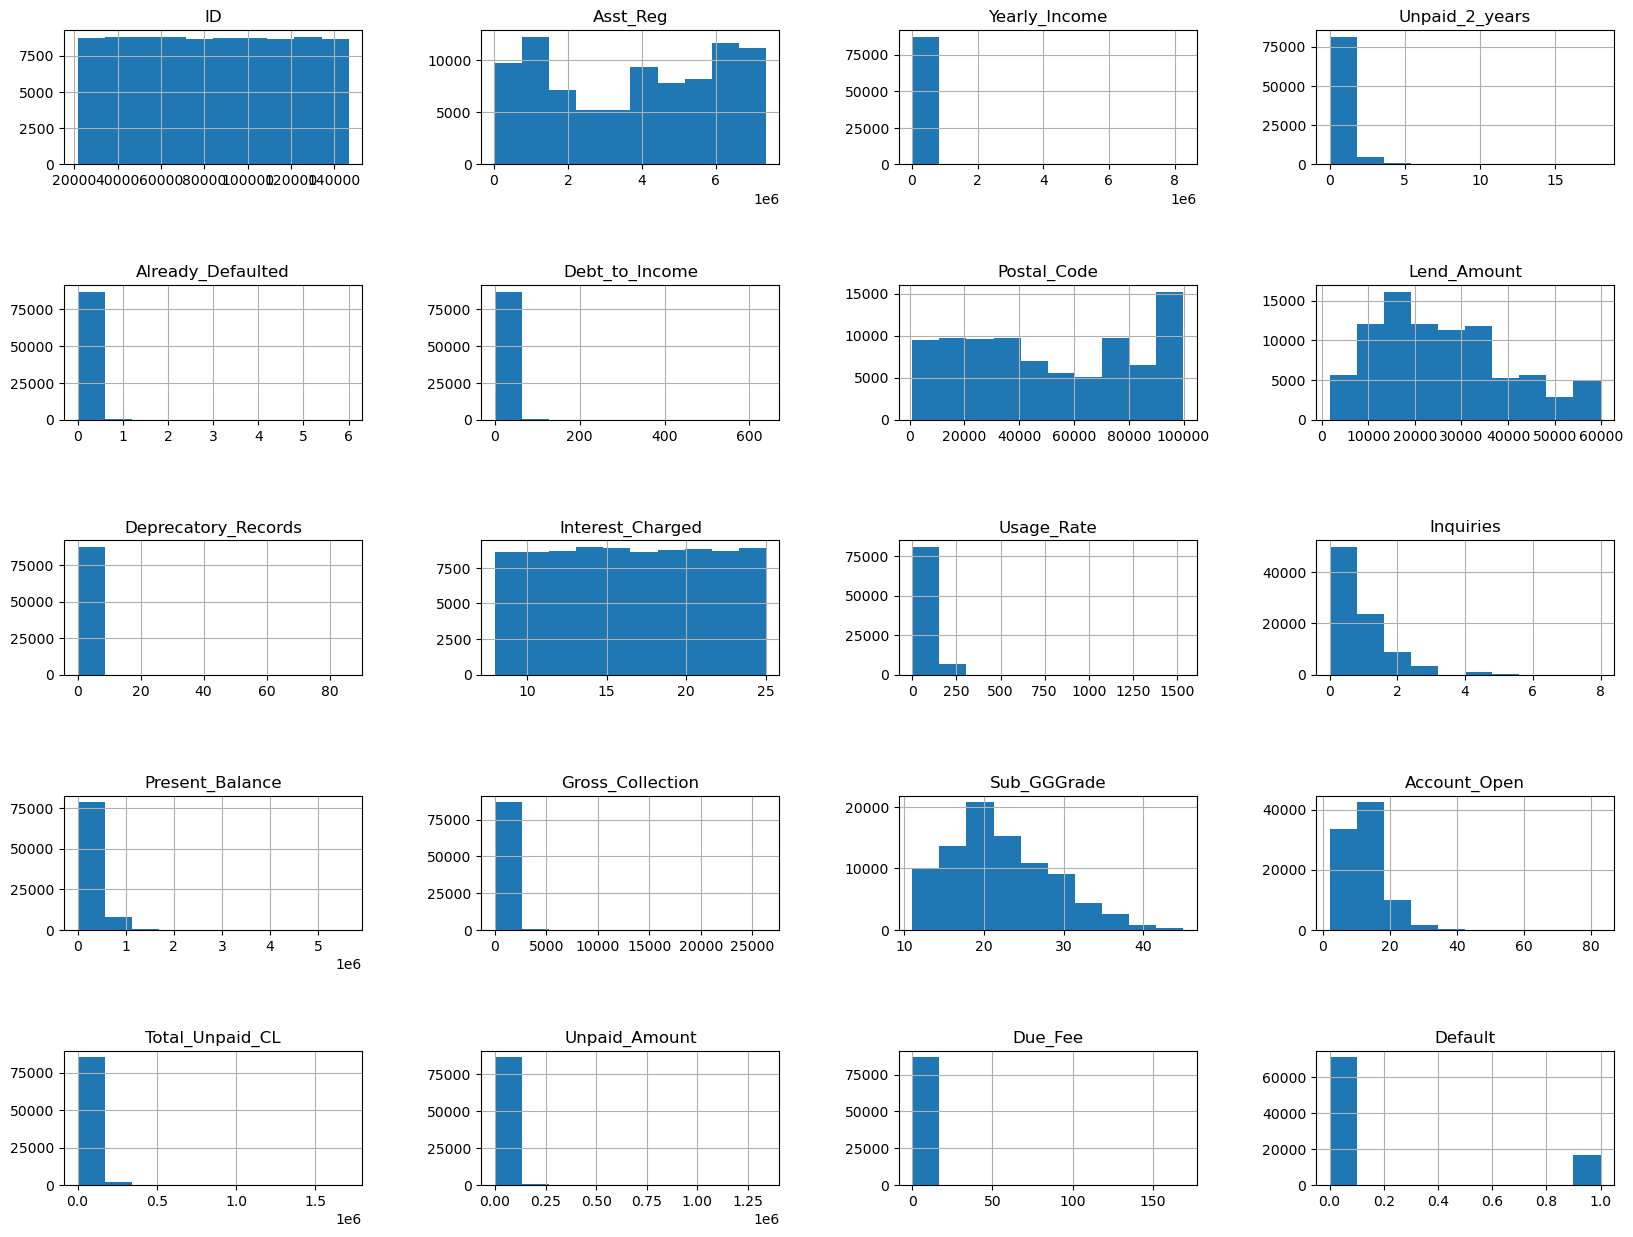

In [105]:
LoanDefaultPrediction.hist(figsize=(20, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.9)

Next let's check out some of our categorical variables

In [107]:
housing = get_counts(LoanDefaultPrediction['Home_Status'])
housing

Home_Status
MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
NONE            4
Name: count, dtype: int64

In [108]:
experience = get_counts(LoanDefaultPrediction['Experience'])
experience

Experience
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: count, dtype: int64

In [109]:
duration = get_counts(LoanDefaultPrediction['Duration'])
duration

Duration
3 years    60061
5 years    27439
Name: count, dtype: int64

In [110]:
states = get_counts(LoanDefaultPrediction['State'])
states

State
California    12625
Newyork        7210
TX             7130
Florida        5813
IL             3502
NewJersey      3253
PA             3169
Ohio           2969
GA             2924
VA             2545
NC             2520
MI             2253
Maryland       2073
AZ             2058
MA             2025
CO             1882
WA             1860
MN             1673
IN             1433
MO             1410
TN             1361
CT             1325
NV             1172
AL             1140
WI             1116
OR             1050
LA             1019
SC             1005
KY              821
KS              819
OK              766
AR              650
UT              639
NM              497
HI              465
NH              427
MS              410
WV              388
RI              372
MT              259
DE              238
DC              235
AK              221
WY              186
SD              181
VT              178
NE              134
ND               50
ME               49
Name: count, d

In [111]:
reason = get_counts(LoanDefaultPrediction['Reason'])
reason

Reason
debt  consolidation    52559
credit  card           21102
home  improvement       4886
other                   3774
major  purchase         1512
medical                  821
small  business          751
car                      710
moving                   503
vacation                 424
house                    311
wedding                  109
RENTwable  energy         38
Name: count, dtype: int64

In [112]:
claims = get_counts(LoanDefaultPrediction['Claim_Type'])
claims

Claim_Type
I    87454
J       46
Name: count, dtype: int64

In [113]:
designations = get_counts(LoanDefaultPrediction['Designation'])
designations

Designation
School Teacher               2999
Super Lead                   1322
Nurse                         743
RN                            646
Owner                         623
                             ... 
supply chain                    1
B.R. Amon and Sons              1
Medical record technician       1
Executive Field Assistant       1
Outside sales rep               1
Name: count, Length: 40348, dtype: int64

Looking at our data we can definitely see some interesting trends but nothing that immediately pops out as a potential issue. One thing I did notice however is that our State column appears to be a little wonky. Specifically, some columns are abbreviated and others are not. Lets fix that up really quick.

In [115]:
mapper = {
    'California' : 'CA',
    'Newyork' : 'NY',
    'Florida' : 'FL',
    'NewJersey' : 'NJ',
    'Ohio' : 'OH',
    'Maryland' : 'MD'
}

state_to_map = LoanDefaultPrediction['State']
mapped_states = []
for state in state_to_map:
    if state in mapper:
        mapped_states.append(mapper[state])
    else:
        mapped_states.append(state)

LoanDefaultPrediction['State'] = mapped_states

In [116]:
states = get_counts(LoanDefaultPrediction['State'])
states

State
CA    12625
NY     7210
TX     7130
FL     5813
IL     3502
NJ     3253
PA     3169
OH     2969
GA     2924
VA     2545
NC     2520
MI     2253
MD     2073
AZ     2058
MA     2025
CO     1882
WA     1860
MN     1673
IN     1433
MO     1410
TN     1361
CT     1325
NV     1172
AL     1140
WI     1116
OR     1050
LA     1019
SC     1005
KY      821
KS      819
OK      766
AR      650
UT      639
NM      497
HI      465
NH      427
MS      410
WV      388
RI      372
MT      259
DE      238
DC      235
AK      221
WY      186
SD      181
VT      178
NE      134
ND       50
ME       49
Name: count, dtype: int64

Much better. Now let's check for duplicate values in our dataset.

In [118]:
duplicate_rows(LoanDefaultPrediction)

No duplicates found in the dataset


,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default


As usual, I am not too surprised here as this is kaggle dataset. Let's just double check there are no duplicate ID's specifically. The other columns we would expect to see some duplicates for at they are demographic information that is not inherently unique.

In [120]:
duplicate_ids = column_duplicates(LoanDefaultPrediction, 'ID')

No duplicate values found in column 'ID'.


Perfect! Now let's grab the mean, median, mode for some of our more interesting numerical columns.

In [122]:
interested_numeric_columns = ['Asst_Reg', 'Yearly_Income', 'Account_Open', 'Total_Unpaid_CL', 'Unpaid_Amount', 'Lend_Amount', 'Inquiries', 'Usage_Rate', 'Present_Balance']
for col in interested_numeric_columns:
    col_summary_stastistics(LoanDefaultPrediction, col)

Asst_Reg Mean: 3798914.1241485714
Asst_Reg Median: 4132010.5
Asst_Reg Mode: [184784, 196745, 199810, 227758, 386104, 588694, 669741, 721450, 806899, 822962, 844803, 856206, 875609, 910072, 911795, 1090707, 1104865, 1195917, 1198399, 1249864, 1362687, 1368994, 1465745, 1470870, 1471938, 1519906, 1659200, 1736174, 1818429, 1987772, 2066746, 2190992, 2370368, 2526572, 2895250, 3093589, 3329945, 3368961, 3482281, 3716559, 4094567, 4238539, 4243460, 4330718, 4402017, 4418313, 4530088, 4534098, 4630275, 4645658, 4646684, 4661661, 4703282, 4738693, 4772166, 4953429, 4959474, 5071993, 5145228, 5194335, 5331221, 5370291, 5375353, 5393686, 5529786, 5720517, 5775997, 5834917, 5875108, 5882030, 5968344, 5980381, 6238431, 6257424, 6428230, 6453742, 6466893, 6472790, 6492307, 6539690, 6638345, 6651336, 6776877, 6971612, 7026385, 7039795, 7054989, 7068909, 7113773, 7118603, 7127909, 7133024, 7135726]


Yearly_Income Mean: 134859.62977978395
Yearly_Income Median: 121440.0
Yearly_Income Mode: [134859.6

Looking at some of our statistics, there is definitely some values of interest here that I would like to dig into further in future work. For now let's do some encoding of our categorical variables.

In [124]:
cols_to_encode = ["GGGrade", "Experience", "Validation", "Home_Status", "File_Status","State","Reason","Claim_Type"]
LoanDefaultPredictionEncoded = one_hot_encoding(LoanDefaultPrediction, cols_to_encode)

In [125]:
LoanDefaultPredictionEncoded.sample(n=5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,house,major purchase,medical,moving,other,small business,vacation,wedding,I,J
62938,97057,6176421,I,7yrs,Vfied,260480.0,MORTGAGE,0,0,Pres,...,0,0,0,0,0,0,0,0,1,0
76980,101937,5489621,I,5yrs,Source Verified,79200.0,RENT,1,0,Psychotherapist,...,0,0,0,0,0,0,0,0,1,0
6371,106331,5974972,IV,>10yrs,Source Verified,86944.0,RENT,0,0,Automotive Techncian,...,0,0,0,0,0,0,0,0,1,0
26502,33392,5401482,I,8yrs,Not Vfied,198880.0,OWN,6,0,Director,...,0,0,0,0,0,0,0,0,1,0
63915,83108,6470678,V,2yrs,Vfied,61600.0,OWN,0,0,Medical Lab Assistant,...,0,0,0,0,0,0,0,0,1,0


Note: Due to the high cardinality of the designation column, and performance strain on my personal computer we will not be one hot encoding it for the sake of this assignment (results in over 40K indvidiual columns). In the future we might look to group these jobs by similar types, and then perform encoding.

lastly, let's export our dataset for easier use in future assignments

In [128]:
#LoanDefaultPredictionEncoded.to_csv('LoanDefaultPredictionClean.csv', index=False)

### Conclusion: **Loan Default Data**

Overall this is a great dataset and I believe is perfectly usable for modeling applications. We had to do a bit of clean up to shore up some NaN and inconsistent values. Looking at trends and breakdowns, nothing stood out to me as anything out of the ordinary. We have sufficient sample sizes and a plethora of valuable features. I am excited to work with this dataset in the coming weeks.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

Going back to the introduction of the book, for this weeks graph I will attempt to recreate the bottom left most chart from page 1

In [133]:
import matplotlib.pyplot as plt

first lets create some dummy data for our chart

In [135]:
segments = [
    'Segment 1', 'Segment 2', 'Segment 3', 
    'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7'
]
us_values = [16, 7, 10, 10, 10, 32, 15]
cust_values = [9, 10, 15, 10, 18, 17, 11]

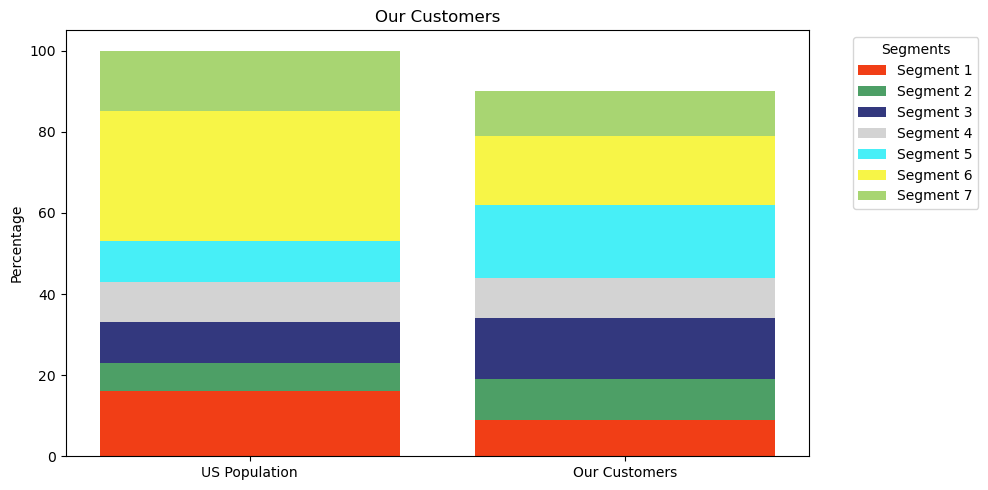

In [136]:
colors = ['#f13e16', '#4d9f66', '#33387e', '#d3d3d3', '#47eff7', '#f7f547', '#a8d572']
x_positions = [0, 1]
labels = ['US Population', 'Our Customers']
fig, ax = plt.subplots(figsize=(10, 5))

bottom_us = 0
bottom_cust = 0
for us, cust, color, segment in zip(us_values, cust_values, colors, segments):
    ax.bar(x_positions[0], us, bottom=bottom_us, color=color)
    ax.bar(x_positions[1], cust, bottom=bottom_cust, color=color, label=segment)
    bottom_us += us
    bottom_cust += cust

ax.set_xticks(x_positions)
ax.set_xticklabels(labels)
ax.set_ylabel('Percentage')
ax.set_title('Our Customers')
ax.legend(title='Segments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Sadly for this graph I was unable to get the percentages inside the stacked bars working the way I wanted them to. That being said, I am pretty happy with how it turned out and will do more experimenting in the future.